In [1]:
from sklearn.datasets.samples_generator import make_blobs
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot

C:\Anaconda3\envs\nlpiaenv\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# prepare a blobs examples with a given random seed
def samples_for_seed(seed):
    
    # generate samples
    X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2,
    random_state=seed)

    # one hot encode output variable
    y = to_categorical(y)

    # split into train and test
    n_train = 500
    trainX, testX = X[:n_train, :], X[n_train:, :]
    trainy, testy = y[:n_train], y[n_train:]
    return trainX, trainy, testX, testy

In [3]:
# define and fit model on a training dataset
def fit_model(trainX, trainy, testX, testy):
    
    # define model
    model = Sequential()
    model.add(Dense(5, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(5, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(3, activation='softmax'))

    # compile model
    model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

    # fit model
    history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
    return model, history

In [4]:
# summarize the performance of the fit model
def summarize_model(model, history, trainX, trainy, testX, testy):
    
    # evaluate the model
    _, train_acc = model.evaluate(trainX, trainy, verbose=0)
    _, test_acc = model.evaluate(testX, testy, verbose=0)
    print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
 
    # plot loss during training
    pyplot.subplot(211)
    pyplot.title('Loss')
    pyplot.plot(history.history['loss'], label='train')
    pyplot.plot(history.history['val_loss'], label='test')
    pyplot.legend()

    # plot accuracy during training
    pyplot.subplot(212)
    pyplot.title('Accuracy')
    pyplot.plot(history.history['accuracy'], label='train')
    pyplot.plot(history.history['val_accuracy'], label='test')
    pyplot.legend()
    pyplot.show()

In [5]:
# prepare data
trainX, trainy, testX, testy = samples_for_seed(2)

In [6]:
# fit model on train dataset
model, history = fit_model(trainX, trainy, testX, testy)

Train: 0.794, Test: 0.838


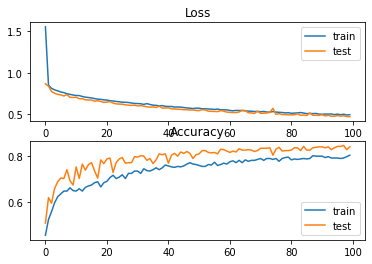

In [7]:
# evaluate model behavior
summarize_model(model, history, trainX, trainy, testX, testy)

In [ ]:
'''In this case, we can
see that the model converged more slowly than we saw on Problem 1 in the previous section.
This suggests that this version of the problem may be slightly more challenging, at least for the
chosen model configuration.'''